**Optical example**

In [1]:
import os
import matplotlib.pyplot as plt

# EOReader
from eoreader.reader import Reader
from eoreader.bands import RED, GREEN, NDVI, YELLOW, CLOUDS, to_str

# Data

Path to external drive: 
/Volumes/Extreme SSD/Data_Satellite_Images/LANDSATS_COL2

In [2]:
path = os.path.join("/Volumes", "Extreme SSD", "Data_Satellite_Images", "LANDSATS_COL2", "LC09_L1TP_152041_20220828_20220828_02_T1.tar")

In [3]:
# Create the reader
reader = Reader()

In [4]:
# Open the product
prod = reader.open(path)
prod

eoreader.LandsatProduct 'LC09_L1TP_152041_20220828_20220828_02_T1'
Attributes:
	condensed_name: 20220828T055634_L9_152041_OLI_TIRS
	path: /Volumes/Extreme SSD/Data_Satellite_Images/LANDSATS_COL2/LC09_L1TP_152041_20220828_20220828_02_T1.tar
	constellation: Landsat-9
	sensor type: Optical
	product type: L1
	default resolution: 30.0
	acquisition datetime: 2022-08-28T05:56:34
	band mapping:
		COASTAL_AEROSOL: 1
		BLUE: 2
		GREEN: 3
		RED: 4
		NIR: 5
		NARROW_NIR: 5
		CIRRUS: 9
		SWIR_1: 6
		SWIR_2: 7
		THERMAL_IR_1: 10
		THERMAL_IR_2: 11
		PANCHROMATIC: 8
	needs extraction: False
	cloud cover: 3.49
	tile name: 152041

/Users/sam/opt/miniconda3/envs/eoreader_env01/lib/python3.9/site-packages/rasterio/__init__.py:277: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/Users/sam/opt/miniconda3/envs/eoreader_env01/lib/python3.9/site-packages/rioxarray/_io.py:851: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


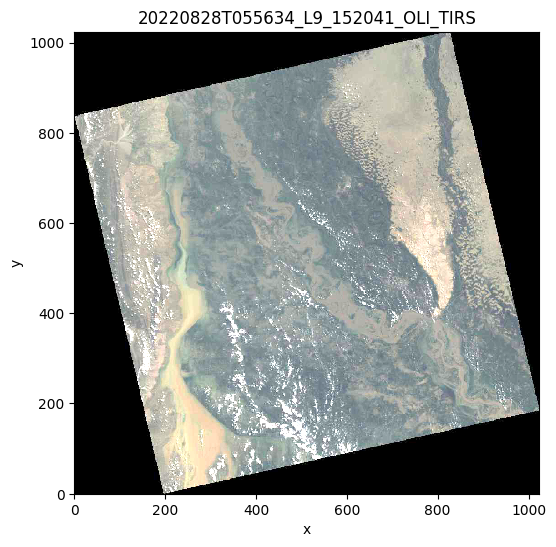

In [5]:
# Plot the quicklook
prod.plot()

In [6]:
# Get the band information
prod.bands

eoreader.SpectralBand 'Coastal aerosol'
Attributes:
	id: 1
	eoreader_name: COASTAL_AEROSOL
	common_name: coastal
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 440.0
	Bandwidth (nm): 20.0
	description: Coastal and aerosol studies
eoreader.SpectralBand 'Blue'
Attributes:
	id: 2
	eoreader_name: BLUE
	common_name: blue
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 480.0
	Bandwidth (nm): 60.0
	description: Bathymetric mapping, distinguishing soil from vegetation and deciduous from coniferous vegetation
eoreader.SpectralBand 'Green'
Attributes:
	id: 3
	eoreader_name: GREEN
	common_name: green
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 560.0
	Bandwidth (nm): 60.0
	description: Emphasizes peak vegetation, which is useful for assessing plant vigor
eoreader.SpectralBand 'Red'
Attributes:
	id: 4
	eoreader_name: RED
	common_name: red
	gsd (m): 30
	asset_role: reflectance
	Center wavelength (nm): 655.0
	Bandwidth (nm): 30.0
	description: Discrim

In [7]:
# Some other information
print(f"Acquisition datetime: {prod.datetime}")
print(f"Condensed name: {prod.condensed_name}")
print(f"Landsat tile: {prod.tile_name}")

Acquisition datetime: 2022-08-28 05:56:34
Condensed name: 20220828T055634_L9_152041_OLI_TIRS
Landsat tile: 152041


In [8]:
# Retrieve the UTM CRS of the tile
prod.crs()

CRS.from_epsg(32642)

<AxesSubplot:>

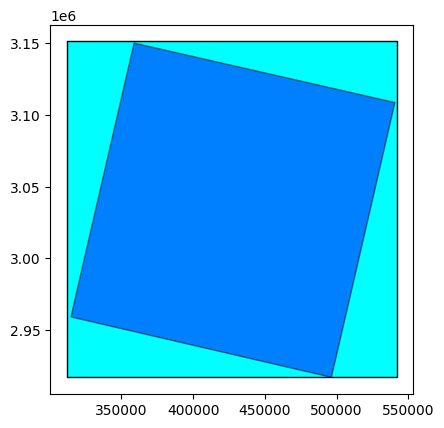

In [9]:
# Open here some more interesting geographical data: extent and footprint
extent = prod.extent()
footprint = prod.footprint()

base = extent.plot(color='cyan', edgecolor='black')
footprint.plot(ax=base, color='blue', edgecolor='black', alpha=0.5)

In [10]:
# Select some bands you want to load
bands = [GREEN, NDVI, YELLOW, CLOUDS]

# Be sure they exist for Landsat-9 OLI-TIRS sensor:
ok_bands = [band for band in bands if prod.has_band(band)]
print(to_str(ok_bands))
# Landsat-9 OLI-TIRS doesn't provide YELLOW band

['GREEN', 'NDVI', 'CLOUDS']


In [ ]:
# Load those bands as a dict of xarray.DataArray
band_dict = prod.load(ok_bands)
band_dict[GREEN]